# 3
## 3.4

In [52]:
# List 3-1
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [53]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [54]:
train_labels[0]

1

In [55]:
max([max(sequence) for sequence in train_data])

9999

In [56]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [57]:
# List 3-2

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## 3.4.3

In [58]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [59]:
# List 3-3

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
# List 3-4, 3-5, 3-6

from tensorflow.keras import optimizers
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

## 3.4.4

In [61]:
# List 3-7

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [62]:
# List 3-8

history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 93us/sample - loss: 0.5160 - acc: 0.7927 - val_loss: 0.3853 - val_acc: 0.8656
Epoch 2/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.3028 - acc: 0.9001 - val_loss: 0.3071 - val_acc: 0.8802
Epoch 3/20
15000/15000 [==============================] - 1s 80us/sample - loss: 0.2153 - acc: 0.9282 - val_loss: 0.2738 - val_acc: 0.8916
Epoch 4/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.1727 - acc: 0.9407 - val_loss: 0.2757 - val_acc: 0.8884
Epoch 5/20
15000/15000 [==============================] - 1s 69us/sample - loss: 0.1363 - acc: 0.9549 - val_loss: 0.2924 - val_acc: 0.8836
Epoch 6/20
15000/15000 [==============================] - 1s 72us/sample - loss: 0.1157 - acc: 0.9629 - val_loss: 0.2987 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.0975 - acc: 0.9695 - val_loss: 0.

In [63]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

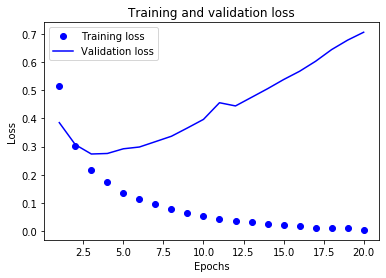

In [64]:
# List 3-9

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

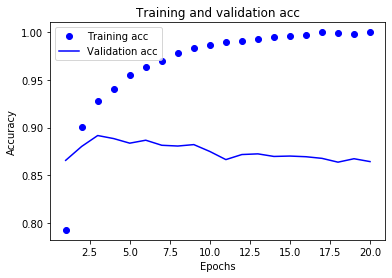

In [65]:
# List 3-10

plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
# List 3-11

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 42us/sample - loss: 0.4673 - acc: 0.8260
Epoch 2/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.2714 - acc: 0.9063
Epoch 3/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.2075 - acc: 0.9259
Epoch 4/4
25000/25000 [==============================] - 2s 79us/sample - loss: 0.2867 - acc: 0.8864


In [67]:
results

[0.28669398968696597, 0.88636]

## 3.4.5

In [68]:
model.predict(x_test)

array([[0.24953324],
       [0.9999145 ],
       [0.9365009 ],
       ...,
       [0.13639581],
       [0.09268293],
       [0.54983616]], dtype=float32)

## 3.4.6
### 隠れ層が1つ

In [69]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 43us/sample - loss: 0.4409 - acc: 0.8286
Epoch 2/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.2716 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 1s 37us/sample - loss: 0.2160 - acc: 0.9257
Epoch 4/4
25000/25000 [==============================] - 2s 74us/sample - loss: 0.2811 - acc: 0.8881


[0.2811022801017761, 0.88808]

In [70]:
model.predict(x_test)

array([[0.2649028 ],
       [0.99957615],
       [0.9123203 ],
       ...,
       [0.1440346 ],
       [0.10897857],
       [0.47645998]], dtype=float32)

### 隠れ層が3つ

In [71]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 42us/sample - loss: 0.4578 - acc: 0.8152
Epoch 2/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.2472 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.1920 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 2s 76us/sample - loss: 0.3201 - acc: 0.8776


[0.3201279663848877, 0.87764]

In [72]:
model.predict(x_test)

array([[0.10600895],
       [0.9998533 ],
       [0.8141331 ],
       ...,
       [0.09204894],
       [0.04940307],
       [0.5917435 ]], dtype=float32)

### 隠れユニット数が 32

In [73]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 43us/sample - loss: 0.4178 - acc: 0.8232
Epoch 2/4
25000/25000 [==============================] - 1s 40us/sample - loss: 0.2350 - acc: 0.9138
Epoch 3/4
25000/25000 [==============================] - 1s 40us/sample - loss: 0.1899 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 2s 79us/sample - loss: 0.3213 - acc: 0.8758


[0.3212674221277237, 0.8758]

In [74]:
model.predict(x_test)

array([[0.17111328],
       [0.9999261 ],
       [0.9703286 ],
       ...,
       [0.21659258],
       [0.05400026],
       [0.8429493 ]], dtype=float32)

### 隠れユニット数が 64

In [75]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 45us/sample - loss: 0.4174 - acc: 0.8161
Epoch 2/4
25000/25000 [==============================] - 1s 41us/sample - loss: 0.2351 - acc: 0.9114
Epoch 3/4
25000/25000 [==============================] - 1s 41us/sample - loss: 0.1842 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 2s 75us/sample - loss: 0.3173 - acc: 0.8784


[0.31733141824245453, 0.87844]

In [76]:
model.predict(x_test)

array([[0.15459797],
       [0.9999287 ],
       [0.9225359 ],
       ...,
       [0.16717827],
       [0.05445147],
       [0.6327479 ]], dtype=float32)

### 損失関数を binary_crossentropy から mse に変更する

In [77]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 43us/sample - loss: 0.1503 - acc: 0.8212
Epoch 2/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.0800 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 1s 40us/sample - loss: 0.0596 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 2s 76us/sample - loss: 0.0871 - acc: 0.8816


[0.08711775286793709, 0.8816]

In [78]:
model.predict(x_test)

array([[0.16842577],
       [0.998412  ],
       [0.7959219 ],
       ...,
       [0.16439697],
       [0.09054103],
       [0.5547223 ]], dtype=float32)

### 活性化関数を reru から tanh に変更する

In [79]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 44us/sample - loss: 0.4123 - acc: 0.8316
Epoch 2/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.2330 - acc: 0.9144
Epoch 3/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.1787 - acc: 0.9343
Epoch 4/4
25000/25000 [==============================] - 2s 78us/sample - loss: 0.3297 - acc: 0.8744


[0.3296803433942795, 0.8744]

In [80]:
model.predict(x_test)

array([[0.0664624 ],
       [0.9979706 ],
       [0.853549  ],
       ...,
       [0.06711394],
       [0.03463316],
       [0.6686077 ]], dtype=float32)